# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [1]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


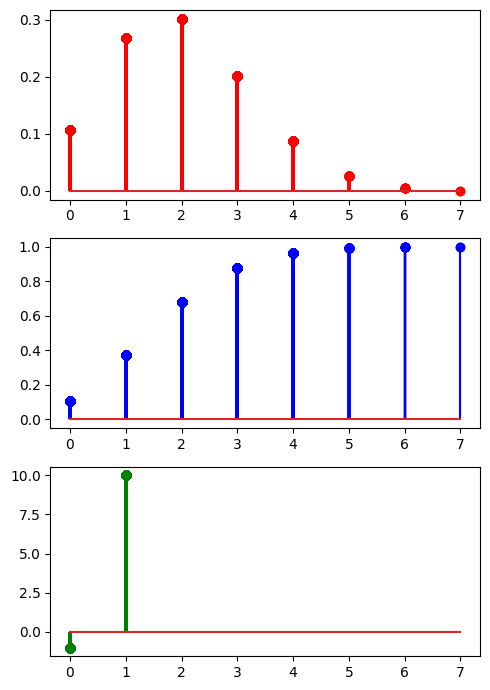

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

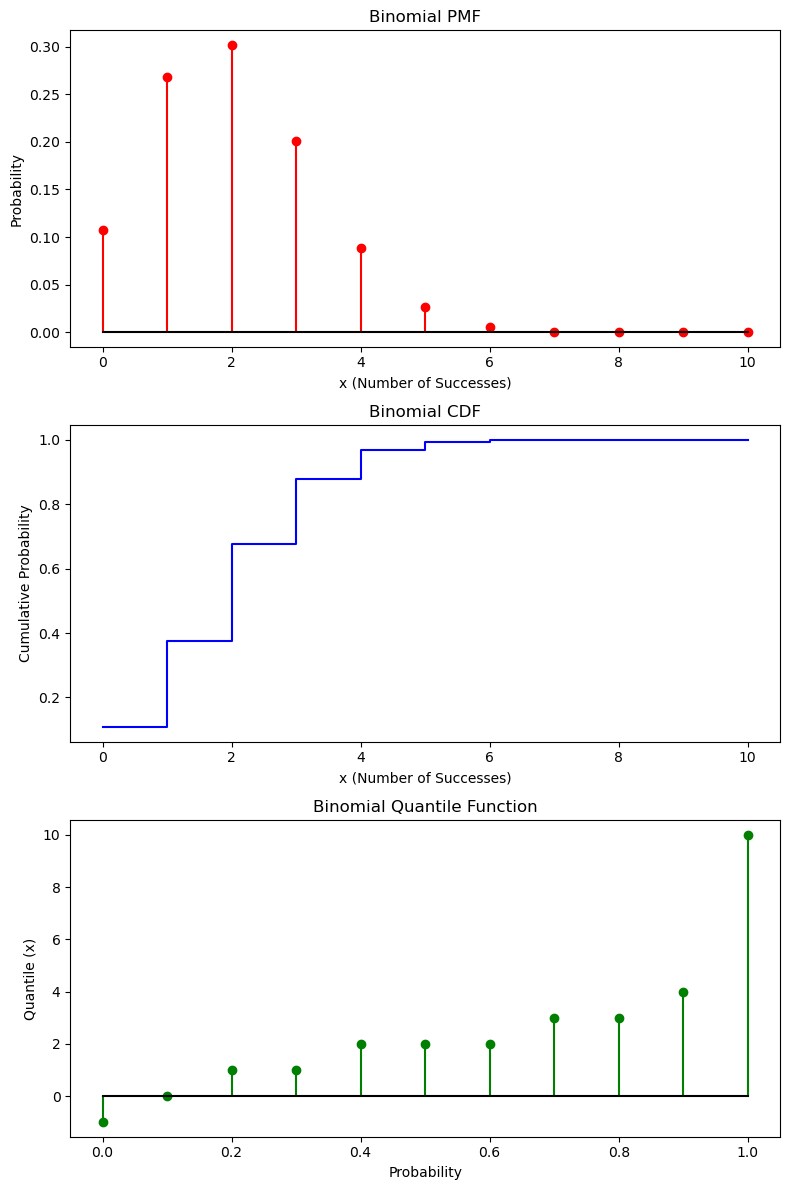

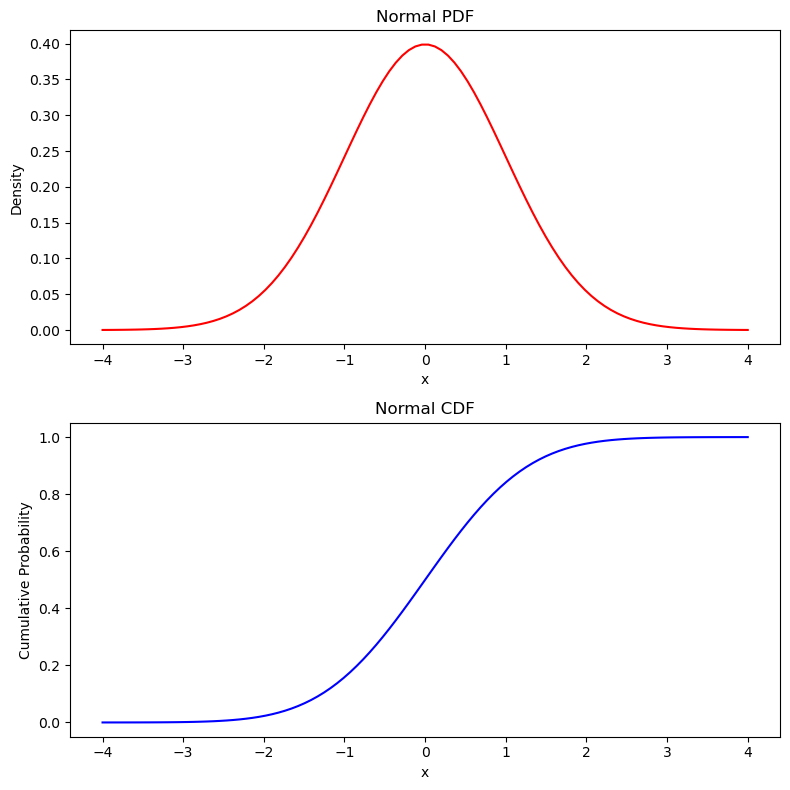

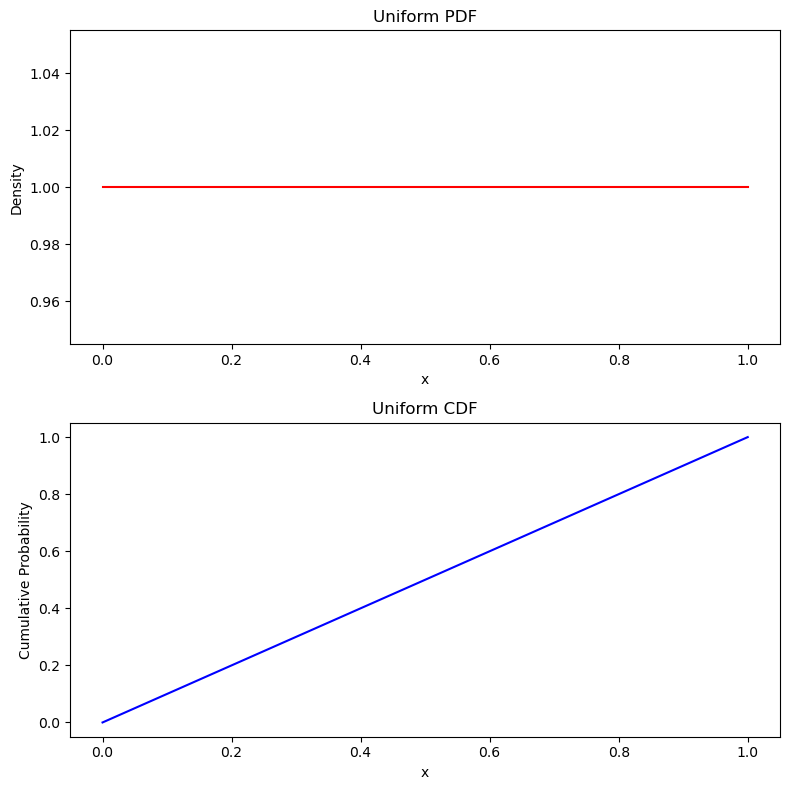

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, uniform

# Binomial Distribution Functions
def dbinom(x, size, prob=0.5):
    return binom.pmf(k=x, n=size, p=prob, loc=0)

def pbinom(q, size, prob=0.5):
    return binom.cdf(k=q, n=size, p=prob, loc=0)

def qbinom(p, size, prob=0.5):
    return binom.ppf(q=p, n=size, p=prob, loc=0)

def rbinom(n, size, prob=0.5):
    return binom.rvs(n=size, p=prob, size=n)


# Normal Distribution Functions
def dnorm(x, mean=0, sd=1):
    return norm.pdf(x, loc=mean, scale=sd)

def pnorm(q, mean=0, sd=1):
    return norm.cdf(q, loc=mean, scale=sd)

def qnorm(p, mean=0, sd=1):
    return norm.ppf(p, loc=mean, scale=sd)

def rnorm(n, mean=0, sd=1):
    return norm.rvs(loc=mean, scale=sd, size=n)


# Uniform Distribution Functions
def dunif(x, min_val=0, max_val=1):
    return uniform.pdf(x, loc=min_val, scale=max_val - min_val)

def punif(q, min_val=0, max_val=1):
    return uniform.cdf(q, loc=min_val, scale=max_val - min_val)

def qunif(p, min_val=0, max_val=1):
    return uniform.ppf(p, loc=min_val, scale=max_val - min_val)

def runif(n, min_val=0, max_val=1):
    return uniform.rvs(loc=min_val, scale=max_val - min_val, size=n)


# Visualization Function
def plot_distributions():
    # Binomial Distribution
    size, prob = 10, 0.2
    x_binom = np.arange(0, size + 1)
    pmf_binom = dbinom(x_binom, size=size, prob=prob)
    cdf_binom = pbinom(x_binom, size=size, prob=prob)

    fig, ax = plt.subplots(3, 1, figsize=(8, 12))
    ax[0].stem(x_binom, pmf_binom, linefmt='r-', basefmt='k', markerfmt='ro')
    ax[0].set_title("Binomial PMF")
    ax[0].set_xlabel("x (Number of Successes)")
    ax[0].set_ylabel("Probability")

    ax[1].step(x_binom, cdf_binom, where="post", color="b")
    ax[1].set_title("Binomial CDF")
    ax[1].set_xlabel("x (Number of Successes)")
    ax[1].set_ylabel("Cumulative Probability")

    random_probs = np.linspace(0, 1, 11)
    quantiles_binom = [qbinom(p, size=size, prob=prob) for p in random_probs]
    ax[2].stem(random_probs, quantiles_binom, linefmt='g-', basefmt='k', markerfmt='go')
    ax[2].set_title("Binomial Quantile Function")
    ax[2].set_xlabel("Probability")
    ax[2].set_ylabel("Quantile (x)")

    plt.tight_layout()
    plt.show()

    # Normal Distribution
    mean, sd = 0, 1
    x_norm = np.linspace(-4, 4, 100)
    pdf_norm = dnorm(x_norm, mean=mean, sd=sd)
    cdf_norm = pnorm(x_norm, mean=mean, sd=sd)

    fig, ax = plt.subplots(2, 1, figsize=(8, 8))
    ax[0].plot(x_norm, pdf_norm, 'r-')
    ax[0].set_title("Normal PDF")
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("Density")

    ax[1].plot(x_norm, cdf_norm, 'b-')
    ax[1].set_title("Normal CDF")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("Cumulative Probability")

    plt.tight_layout()
    plt.show()

    # Uniform Distribution
    min_val, max_val = 0, 1
    x_unif = np.linspace(min_val, max_val, 100)
    pdf_unif = dunif(x_unif, min_val=min_val, max_val=max_val)
    cdf_unif = punif(x_unif, min_val=min_val, max_val=max_val)

    fig, ax = plt.subplots(2, 1, figsize=(8, 8))
    ax[0].plot(x_unif, pdf_unif, 'r-')
    ax[0].set_title("Uniform PDF")
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("Density")

    ax[1].plot(x_unif, cdf_unif, 'b-')
    ax[1].set_title("Uniform CDF")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("Cumulative Probability")

    plt.tight_layout()
    plt.show()


# Example Usage
if __name__ == "__main__":
    np.random.seed(42)
    plot_distributions()
